In [2]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
sample_images = pd.read_csv("csvs/sample_images.csv", sep="\t")
sample_images.drop([c for c in sample_images.columns if "Unnamed" in c], inplace=True, axis=1)
sample_images.head()

,im_nr,imnm,kaart_nr,map,edges,image,imnr
0,1_0001,1,789d224e-e8eb-102c-b6de-005056a23d00,1,1242,NL-HaNA_2.05.159_1_0001.jpg,1
1,29_0031,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1876,NL-HaNA_2.05.159_29_0031.jpg,31
2,1_0201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,1620,NL-HaNA_2.05.159_1_0201.jpg,201
3,1_0401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,861,NL-HaNA_2.05.159_1_0401.jpg,401
4,1_0601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,1322,NL-HaNA_2.05.159_1_0601.jpg,601


In [4]:
#divide images into fronts and back, and turn them into separate dataframes
x = sample_images.image.str.rpartition('_')
x = x[2].str.split('.', expand=True)
even_edges = sample_images.iloc[x.loc[x[0].astype('int64') % 2 ==0 ].index].copy()
odd_edges = sample_images.iloc[x.loc[x[0].astype('int64') % 2 !=0 ].index].copy()
even_edges.head()
# there are not many card backs in this file; we'll remediate that

,im_nr,imnm,kaart_nr,map,edges,image,imnr
6,30_0064,64,76c99c72-e8eb-102c-b6de-005056a23d00,30,1977,NL-HaNA_2.05.159_30_0064.jpg,64


In [5]:
all_images = pd.read_csv("/Users/rikhoekstra/surfdrive/emigratie/alledges.csv")


In [6]:
def get_edges(im):
    edges = 0
    urltemplate = 'NL-HaNA_2.05.159_{mp}_{imnr}.jpg'
    lok = urltemplate.format(mp=im['map'], imnr="{:04d}".format(int(im['imnm']) + 1))
    try:
        edges = all_images.loc[all_images.file == lok ].iloc[0]['edges']
    except IndexError:
        pass
    return edges


In [7]:
def itemplus(im):
    nwn = int(im['imnm']) + 1
    #print(nwn)
    #print(im['imnm'])
    imn = "{:04d}".format(int(im['imnm']) + 1)
    imnr = im['image'][:-8] + imn + '.jpg'
    nim = im
    edges = get_edges(im)
    nim['im_nr'] = "{}_{}".format(im['map'], imn)
    nim['imnm'] = nwn
    nim['image'] =  imnr
    nim['imnr'] = nwn
    nim['edges'] = edges
    return nim




In [8]:
nwrs = []
dnws = sample_images.to_records()
for item in dnws:
    nwitem = itemplus(item)
    nwrs.append(nwitem)
nncolumns = ['old_index']
nncolumns.extend(sample_images.columns)
print(nncolumns)
nn = pd.DataFrame.from_records(nwrs, columns=nncolumns)


['old_index', 'im_nr', 'imnm', 'kaart_nr', 'map', 'edges', 'image', 'imnr']


In [9]:
complete_simgs = pd.concat([sample_images, nn], ignore_index=True)
complete_simgs

/Users/rikhoekstra/anaconda/envs/36/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,edges,im_nr,image,imnm,imnr,kaart_nr,map,old_index
0,1242,1_0001,NL-HaNA_2.05.159_1_0001.jpg,1,1,789d224e-e8eb-102c-b6de-005056a23d00,1,NaN
1,1876,29_0031,NL-HaNA_2.05.159_29_0031.jpg,31,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,NaN
2,1620,1_0201,NL-HaNA_2.05.159_1_0201.jpg,201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,NaN
3,861,1_0401,NL-HaNA_2.05.159_1_0401.jpg,401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,NaN
4,1322,1_0601,NL-HaNA_2.05.159_1_0601.jpg,601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,NaN
5,1613,1_0801,NL-HaNA_2.05.159_1_0801.jpg,801,801,78a54e74-e8eb-102c-b6de-005056a23d00,1,NaN
6,1977,30_0064,NL-HaNA_2.05.159_30_0064.jpg,64,64,76c99c72-e8eb-102c-b6de-005056a23d00,30,NaN
7,1319,1_0999,NL-HaNA_2.05.159_1_0999.jpg,999,999,78a73982-e8eb-102c-b6de-005056a23d00,1,NaN
8,1627,1_1201,NL-HaNA_2.05.159_1_1201.jpg,1201,1201,78a944ca-e8eb-102c-b6de-005056a23d00,1,NaN
9,1604,30_1279,NL-HaNA_2.05.159_30_1279.jpg,1279,1279,76d1ffd4-e8eb-102c-b6de-005056a23d00,30,NaN


In [10]:
# once again divide images into fronts and back, and turn them into separate dataframes
x = complete_simgs.image.str.rpartition('_')
x = x[2].str.split('.', expand=True)
even_edges = complete_simgs.iloc[x.loc[x[0].astype('int64') % 2 ==0 ].index].copy()
odd_edges = complete_simgs.iloc[x.loc[x[0].astype('int64') % 2 !=0 ].index].copy()
even_edges.head()
# there are not many card backs in this file; we'll remediate that

,edges,im_nr,image,imnm,imnr,kaart_nr,map,old_index
6,1977,30_0064,NL-HaNA_2.05.159_30_0064.jpg,64,64,76c99c72-e8eb-102c-b6de-005056a23d00,30,NaN
689,407,1_0002,NL-HaNA_2.05.159_1_0002.jpg,2,2,789d224e-e8eb-102c-b6de-005056a23d00,1,0.0
690,1019,29_0032,NL-HaNA_2.05.159_29_0032.jpg,32,32,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1.0
691,18,1_0202,NL-HaNA_2.05.159_1_0202.jpg,202,202,789f164e-e8eb-102c-b6de-005056a23d00,1,2.0
692,2126,1_0402,NL-HaNA_2.05.159_1_0402.jpg,402,402,78a135b4-e8eb-102c-b6de-005056a23d00,1,3.0


In [11]:
print(len(complete_simgs))
print(len(even_edges))
print(len(odd_edges))

1378
689
689


In [12]:
odd_edges["edges"] = odd_edges.edges.astype("int64", inplace=True)

In [13]:
d_o = odd_edges.edges.value_counts()
d_e = even_edges.edges.value_counts()

/Users/rikhoekstra/anaconda/envs/36/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


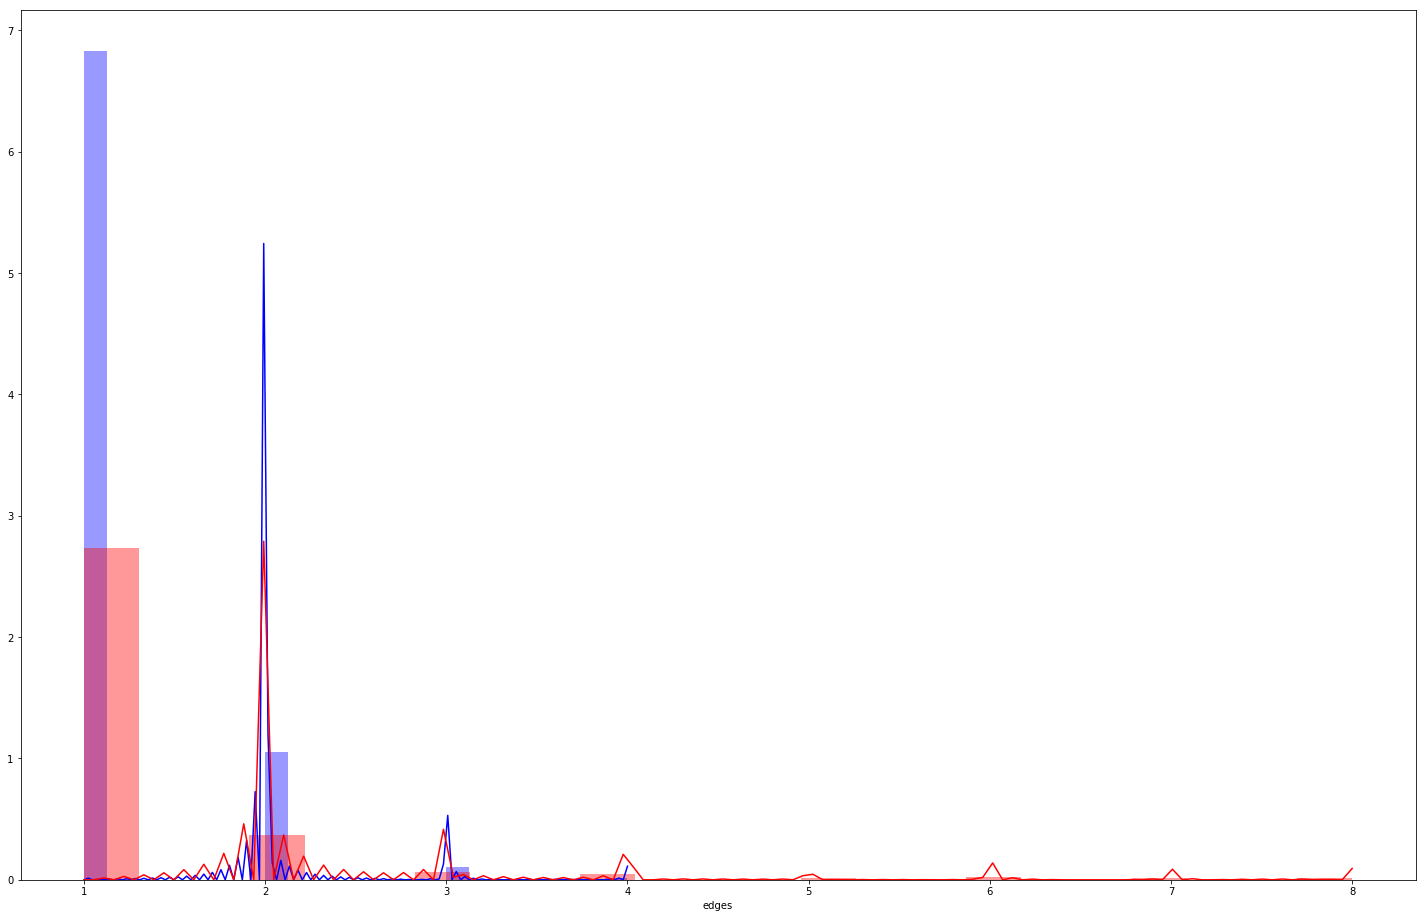

In [14]:
fig = plt.figure(figsize=(25, 16))
ax1 = fig.add_subplot(111)
sns.distplot(d_o, ax=ax1, color="blue")
sns.distplot(d_e, ax=ax1, color="red")
#but the number of values is too small to see real patterns. So we try classifying them


now we extend this

* First we take all images per person and sum the densities. See what that brings. Then we see if it makes a difference if we take all images except the front of the first card (that contains few events)
* and then we try to correlate this with the different migrant features and see if we can make a 'card density profile' for groups. We will refer to notebook 3 for earlier excercises


In [15]:
#these cut values come from the previous notebook
odd_cuts = [0, 800, 1100, 1450, 1950, odd_edges.edges.max()]
even_cuts = [0, 200, 400, 800, 1600, 2500, even_edges.edges.max()]
labelled = ['empty','small', 'medium-sm','medium-l','large','dense']

#but we adjusted them because for the sample there are too few images

In [16]:
fronts = pd.cut(odd_edges.edges, [0, 800, 1100, 1450, 1950, odd_edges.edges.max()],
               labels=['empty','small', 'medium','large','dense']).value_counts()
fronts.sort_index(inplace=True)
print(fronts)
print(fronts.sum())

empty      92
small     133
medium    168
large     168
dense     128
Name: edges, dtype: int64
689


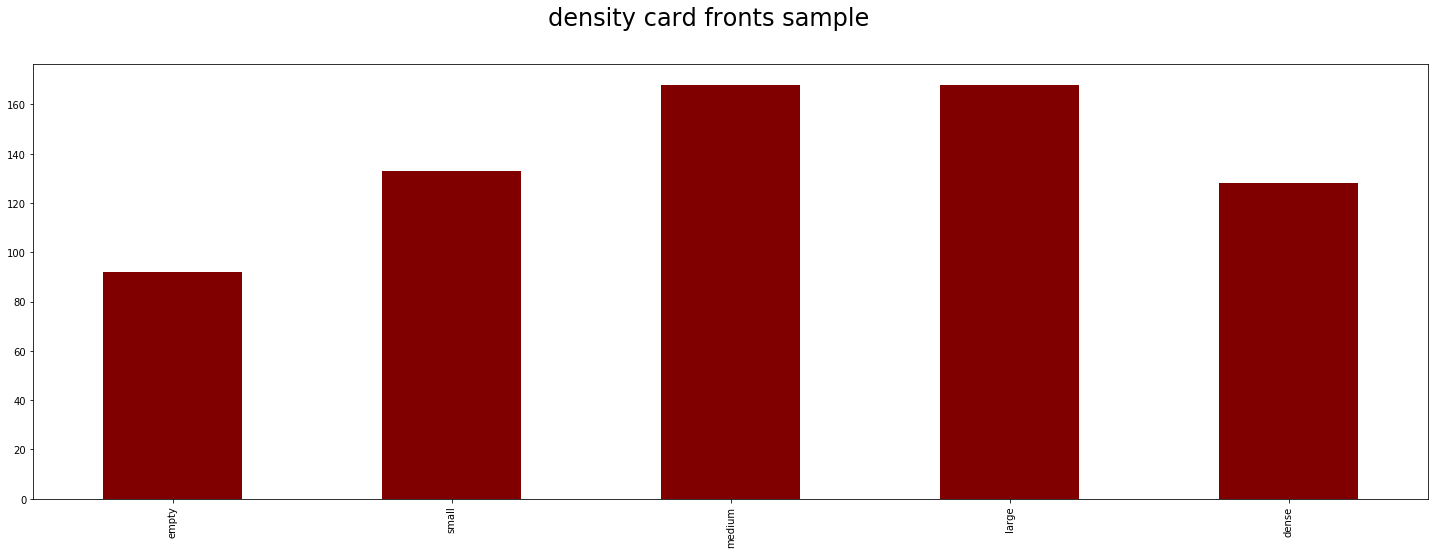

In [17]:
fig = plt.figure(figsize=(25, 8))
fig.suptitle("density card fronts sample", fontsize="24")
ax1 = fig.add_subplot(111)
fronts.sort_index().plot.bar(color='maroon', ax=ax1)

In [18]:
odd_edges['density'] = pd.cut(odd_edges.edges, [0, 800, 1100, 1450, 1950, odd_edges.edges.max()],
               labels=['empty','small', 'medium','large','dense'])
odd_edges['url'] = odd_edges["map"].apply(lambda x: "https://migrantcards.huygens.knaw.nl/cards/%(number)02d/" % {"number":int(x)})
odd_edges.head()

,edges,im_nr,image,imnm,imnr,kaart_nr,map,old_index,density,url
0,1242,1_0001,NL-HaNA_2.05.159_1_0001.jpg,1,1,789d224e-e8eb-102c-b6de-005056a23d00,1,NaN,medium,https://migrantcards.huygens.knaw.nl/cards/01/
1,1876,29_0031,NL-HaNA_2.05.159_29_0031.jpg,31,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,NaN,large,https://migrantcards.huygens.knaw.nl/cards/29/
2,1620,1_0201,NL-HaNA_2.05.159_1_0201.jpg,201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,NaN,large,https://migrantcards.huygens.knaw.nl/cards/01/
3,861,1_0401,NL-HaNA_2.05.159_1_0401.jpg,401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,NaN,small,https://migrantcards.huygens.knaw.nl/cards/01/
4,1322,1_0601,NL-HaNA_2.05.159_1_0601.jpg,601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,NaN,medium,https://migrantcards.huygens.knaw.nl/cards/01/


In [19]:
backs = pd.cut(even_edges.edges, [0, 200, 600, 1200, 1900, even_edges.edges.max()],
               labels=['empty','small', 'medium','large','dense']).value_counts()
backs.sort_index(inplace=True)
print(backs)
print(backs.sum())

empty     213
small     143
medium    129
large      69
dense     135
Name: edges, dtype: int64
689


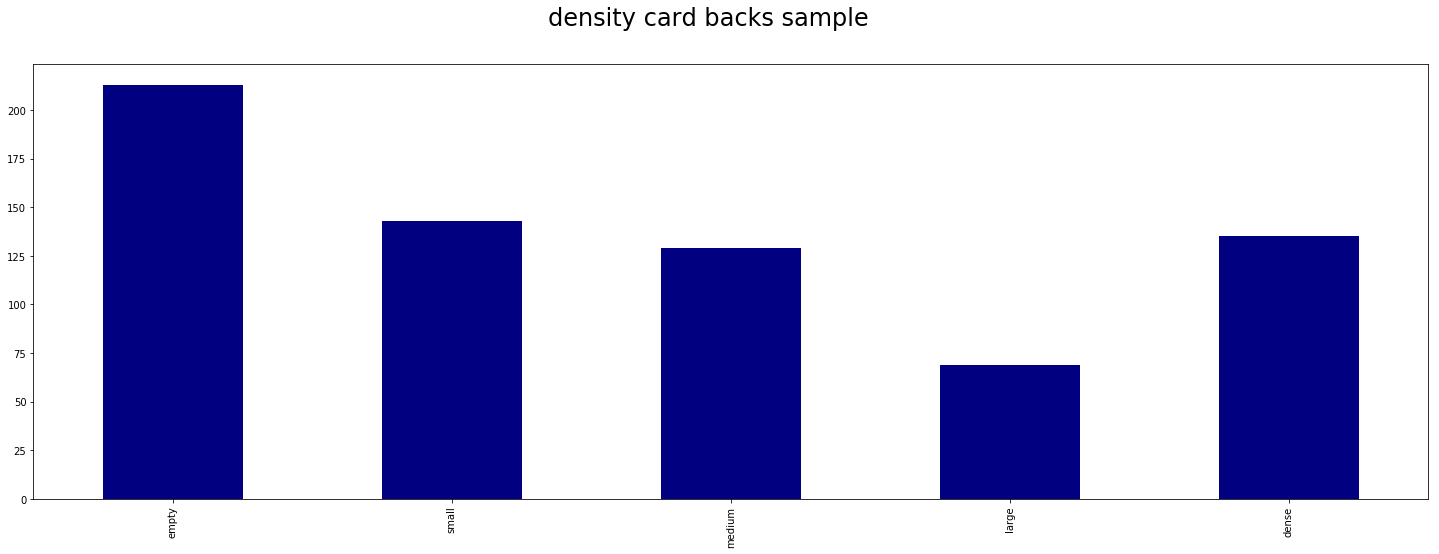

In [20]:
fig = plt.figure(figsize=(25, 8))
fig.suptitle("density card backs sample", fontsize="24")
ax1 = fig.add_subplot(111)
backs.sort_index().plot.bar(color='navy', ax=ax1)

In [21]:
even_edges['density'] = pd.cut(even_edges.edges, [0, 200, 600, 1200, 1900, even_edges.edges.max()],
               labels=['empty','small', 'medium','large','dense'])
even_edges['url'] = even_edges["map"].apply(lambda x: "https://migrantcards.huygens.knaw.nl/cards/%(number)02d/" % {"number":int(x)})
even_edges.head()

,edges,im_nr,image,imnm,imnr,kaart_nr,map,old_index,density,url
6,1977,30_0064,NL-HaNA_2.05.159_30_0064.jpg,64,64,76c99c72-e8eb-102c-b6de-005056a23d00,30,NaN,dense,https://migrantcards.huygens.knaw.nl/cards/30/
689,407,1_0002,NL-HaNA_2.05.159_1_0002.jpg,2,2,789d224e-e8eb-102c-b6de-005056a23d00,1,0.0,small,https://migrantcards.huygens.knaw.nl/cards/01/
690,1019,29_0032,NL-HaNA_2.05.159_29_0032.jpg,32,32,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1.0,medium,https://migrantcards.huygens.knaw.nl/cards/29/
691,18,1_0202,NL-HaNA_2.05.159_1_0202.jpg,202,202,789f164e-e8eb-102c-b6de-005056a23d00,1,2.0,empty,https://migrantcards.huygens.knaw.nl/cards/01/
692,2126,1_0402,NL-HaNA_2.05.159_1_0402.jpg,402,402,78a135b4-e8eb-102c-b6de-005056a23d00,1,3.0,dense,https://migrantcards.huygens.knaw.nl/cards/01/


## Analysis

Like with the complete collection of images, there is a marked difference between the fronts and the backs of the cards, corresponding to the largely formal information of the consulates on the fronts and the interaction information on the backs, that we have started calling events. Note that (therefore) the bin borders are somewhat different for card fronts and backs.

We first score each image on the densities on a scale from 0-4 (so that empty fronts and backs get no score) and then sum those per unit.

Now we need the distribution of the different densities over the various variables of the sample.

In [22]:
cimgs = odd_edges.append(even_edges)
cimgs.drop(['old_index'], axis=1, inplace=True)
catmapping = {'empty':0,'small':1, 'medium':2,'large':3,'dense':4}
cimgs['s'] = cimgs.density.map(catmapping)
cimgs.head()

,edges,im_nr,image,imnm,imnr,kaart_nr,map,density,url,s
0,1242,1_0001,NL-HaNA_2.05.159_1_0001.jpg,1,1,789d224e-e8eb-102c-b6de-005056a23d00,1,medium,https://migrantcards.huygens.knaw.nl/cards/01/,2
1,1876,29_0031,NL-HaNA_2.05.159_29_0031.jpg,31,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,large,https://migrantcards.huygens.knaw.nl/cards/29/,3
2,1620,1_0201,NL-HaNA_2.05.159_1_0201.jpg,201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,large,https://migrantcards.huygens.knaw.nl/cards/01/,3
3,861,1_0401,NL-HaNA_2.05.159_1_0401.jpg,401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,small,https://migrantcards.huygens.knaw.nl/cards/01/,1
4,1322,1_0601,NL-HaNA_2.05.159_1_0601.jpg,601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,medium,https://migrantcards.huygens.knaw.nl/cards/01/,2


In [23]:
cimgs.groupby(["kaart_nr"]).s.sum()

kaart_nr
76abc6fc-e8eb-102c-b6de-005056a23d00    1
76ac1a9e-e8eb-102c-b6de-005056a23d00    5
76ade310-e8eb-102c-b6de-005056a23d00    4
76af9d54-e8eb-102c-b6de-005056a23d00    7
76b2bcd2-e8eb-102c-b6de-005056a23d00    3
76b48d28-e8eb-102c-b6de-005056a23d00    2
76b52ff8-e8eb-102c-b6de-005056a23d00    5
76b752d8-e8eb-102c-b6de-005056a23d00    2
76b955ba-e8eb-102c-b6de-005056a23d00    4
76bb6ef4-e8eb-102c-b6de-005056a23d00    5
76bd9bd4-e8eb-102c-b6de-005056a23d00    4
76bfcc06-e8eb-102c-b6de-005056a23d00    6
76c093d4-e8eb-102c-b6de-005056a23d00    0
76c1f18e-e8eb-102c-b6de-005056a23d00    1
76c4109a-e8eb-102c-b6de-005056a23d00    2
76c62722-e8eb-102c-b6de-005056a23d00    8
76c6e162-e8eb-102c-b6de-005056a23d00    7
76c83b98-e8eb-102c-b6de-005056a23d00    5
76c8f998-e8eb-102c-b6de-005056a23d00    5
76c9235a-e8eb-102c-b6de-005056a23d00    3
76c99c72-e8eb-102c-b6de-005056a23d00    6
76cb1c96-e8eb-102c-b6de-005056a23d00    2
76cd2766-e8eb-102c-b6de-005056a23d00    1
76cd2cca-e8eb-102c-b6de-0

In [24]:
pd.concat([cimgs,])

,edges,im_nr,image,imnm,imnr,kaart_nr,map,density,url,s
0,1242,1_0001,NL-HaNA_2.05.159_1_0001.jpg,1,1,789d224e-e8eb-102c-b6de-005056a23d00,1,medium,https://migrantcards.huygens.knaw.nl/cards/01/,2
1,1876,29_0031,NL-HaNA_2.05.159_29_0031.jpg,31,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,large,https://migrantcards.huygens.knaw.nl/cards/29/,3
2,1620,1_0201,NL-HaNA_2.05.159_1_0201.jpg,201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,large,https://migrantcards.huygens.knaw.nl/cards/01/,3
3,861,1_0401,NL-HaNA_2.05.159_1_0401.jpg,401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,small,https://migrantcards.huygens.knaw.nl/cards/01/,1
4,1322,1_0601,NL-HaNA_2.05.159_1_0601.jpg,601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,medium,https://migrantcards.huygens.knaw.nl/cards/01/,2
5,1613,1_0801,NL-HaNA_2.05.159_1_0801.jpg,801,801,78a54e74-e8eb-102c-b6de-005056a23d00,1,large,https://migrantcards.huygens.knaw.nl/cards/01/,3
7,1319,1_0999,NL-HaNA_2.05.159_1_0999.jpg,999,999,78a73982-e8eb-102c-b6de-005056a23d00,1,medium,https://migrantcards.huygens.knaw.nl/cards/01/,2
8,1627,1_1201,NL-HaNA_2.05.159_1_1201.jpg,1201,1201,78a944ca-e8eb-102c-b6de-005056a23d00,1,large,https://migrantcards.huygens.knaw.nl/cards/01/,3
9,1604,30_1279,NL-HaNA_2.05.159_30_1279.jpg,1279,1279,76d1ffd4-e8eb-102c-b6de-005056a23d00,30,large,https://migrantcards.huygens.knaw.nl/cards/30/,3
10,1247,1_1401,NL-HaNA_2.05.159_1_1401.jpg,1401,1401,78ab5508-e8eb-102c-b6de-005056a23d00,1,medium,https://migrantcards.huygens.knaw.nl/cards/01/,2


# and make samples for inspection to another directory

# skip this for now
import pathlib
 
    
flin = open('contactsheet_template.html')
HTMLtemplate = flin.read()
flin.close()

htmloutdir = './htmlout/sample/'
def samples_out(outdir, dataframe, htmloutdir=htmloutdir):
    outdr = os.path.join(htmloutdir, outdir)
    pathlib.Path(outdr).mkdir(parents=True, exist_ok=True)
    df = globals()[dataframe]
    for item in ['empty','small', 'medium','large','dense']:
        temp = df.loc[df.density == item]
        csv_sample = temp.sample(20)
        outflname = os.path.join(outdr, item)
        csv_sample.to_csv(outflname + '.csv')
        htmlout = open(outflname + '.html', 'w')
        htmlout.write(HTMLtemplate % (item + '.csv',))
        htmlout.close()

for i in ['odd']:
    samples_out(i, '%s_edges' % i)

In [25]:
sampled_edges = pd.read_csv('csvs/sampled_edges.csv', sep='\t')
sampled_edges.drop([c for c in sampled_edges.columns if "Unnamed" in c], inplace=True, axis=1)
sampled_edges.drop(sampled_edges.columns[0], inplace=True, axis=1)
keep_columns= ['kaartnummer', 'isStoredAt', 'jaartal_begin', 
               'jaartal_eind','referencesPerson', 'referencesCollective','image']
sampled_edges.drop([c for c in sampled_edges.columns if c not in keep_columns], inplace=True, axis=1)
sampled_edges.head()

,kaartnummer,isStoredAt,jaartal_begin,jaartal_eind,referencesPerson,referencesCollective,image
0,t_20180328_1,Sydney,1961,1966.0,38405,Melbourne,NL-HaNA_2.05.159_35_1201.jpg
1,t_20180328_2,Melbourne,1962,1964.0,22345,Adelaide,NL-HaNA_2.05.159_26_0423.jpg
2,t_20180328_3,melbourne,1968,1968.0,22766,Sydney,NL-HaNA_2.05.159_26_0043.jpg
3,t_20180405_4,Melbourne,1956,1960.0,34973,Melbourne,NL-HaNA_2.05.159_11_0003.jpg
4,76abc6fc-e8eb-102c-b6de-005056a23d00,Sydney,NaN,NaN,1,Sydney,NL-HaNA_2.05.159_29_0001.jpg


In [26]:
edges_person = pd.merge(left=cimgs, right=sampled_edges, left_on=cimgs.kaart_nr, right_on=sampled_edges.kaartnummer, 
                        how="outer", indicator=True)
edges_person.to_csv('edges_person.csv', sep='\t')
edges_person

,key_0,edges,im_nr,image_x,imnm,imnr,kaart_nr,map,density,url,s,kaartnummer,isStoredAt,jaartal_begin,jaartal_eind,referencesPerson,referencesCollective,image_y,_merge
0,789d224e-e8eb-102c-b6de-005056a23d00,1242,1_0001,NL-HaNA_2.05.159_1_0001.jpg,1,1,789d224e-e8eb-102c-b6de-005056a23d00,1,medium,https://migrantcards.huygens.knaw.nl/cards/01/,2,789d224e-e8eb-102c-b6de-005056a23d00,Brisbane,1957,1957.0,23328.0,Sydney,NL-HaNA_2.05.159_1_0001.jpg,both
1,789d224e-e8eb-102c-b6de-005056a23d00,407,1_0002,NL-HaNA_2.05.159_1_0002.jpg,2,2,789d224e-e8eb-102c-b6de-005056a23d00,1,small,https://migrantcards.huygens.knaw.nl/cards/01/,1,789d224e-e8eb-102c-b6de-005056a23d00,Brisbane,1957,1957.0,23328.0,Sydney,NL-HaNA_2.05.159_1_0001.jpg,both
2,76ac1a9e-e8eb-102c-b6de-005056a23d00,1876,29_0031,NL-HaNA_2.05.159_29_0031.jpg,31,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,large,https://migrantcards.huygens.knaw.nl/cards/29/,3,76ac1a9e-e8eb-102c-b6de-005056a23d00,Sydney,1955,1957.0,23328.0,Brisbane,NL-HaNA_2.05.159_29_0031.jpg,both
3,76ac1a9e-e8eb-102c-b6de-005056a23d00,1019,29_0032,NL-HaNA_2.05.159_29_0032.jpg,32,32,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,medium,https://migrantcards.huygens.knaw.nl/cards/29/,2,76ac1a9e-e8eb-102c-b6de-005056a23d00,Sydney,1955,1957.0,23328.0,Brisbane,NL-HaNA_2.05.159_29_0031.jpg,both
4,789f164e-e8eb-102c-b6de-005056a23d00,1620,1_0201,NL-HaNA_2.05.159_1_0201.jpg,201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,large,https://migrantcards.huygens.knaw.nl/cards/01/,3,789f164e-e8eb-102c-b6de-005056a23d00,Brisbane,1952,1953.0,23422.0,Geen,NL-HaNA_2.05.159_1_0201.jpg,both
5,789f164e-e8eb-102c-b6de-005056a23d00,18,1_0202,NL-HaNA_2.05.159_1_0202.jpg,202,202,789f164e-e8eb-102c-b6de-005056a23d00,1,empty,https://migrantcards.huygens.knaw.nl/cards/01/,0,789f164e-e8eb-102c-b6de-005056a23d00,Brisbane,1952,1953.0,23422.0,Geen,NL-HaNA_2.05.159_1_0201.jpg,both
6,78a135b4-e8eb-102c-b6de-005056a23d00,861,1_0401,NL-HaNA_2.05.159_1_0401.jpg,401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,small,https://migrantcards.huygens.knaw.nl/cards/01/,1,78a135b4-e8eb-102c-b6de-005056a23d00,Brisbane,1980,1982.0,23521.0,Sydney,NL-HaNA_2.05.159_1_0401.jpg,both
7,78a135b4-e8eb-102c-b6de-005056a23d00,2126,1_0402,NL-HaNA_2.05.159_1_0402.jpg,402,402,78a135b4-e8eb-102c-b6de-005056a23d00,1,dense,https://migrantcards.huygens.knaw.nl/cards/01/,4,78a135b4-e8eb-102c-b6de-005056a23d00,Brisbane,1980,1982.0,23521.0,Sydney,NL-HaNA_2.05.159_1_0401.jpg,both
8,78a34e1c-e8eb-102c-b6de-005056a23d00,1322,1_0601,NL-HaNA_2.05.159_1_0601.jpg,601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,medium,https://migrantcards.huygens.knaw.nl/cards/01/,2,78a34e1c-e8eb-102c-b6de-005056a23d00,Brisbane,1980,1981.0,1123.0,Sydney,NL-HaNA_2.05.159_1_0601.jpg,both
9,78a34e1c-e8eb-102c-b6de-005056a23d00,899,1_0602,NL-HaNA_2.05.159_1_0602.jpg,602,602,78a34e1c-e8eb-102c-b6de-005056a23d00,1,medium,https://migrantcards.huygens.knaw.nl/cards/01/,2,78a34e1c-e8eb-102c-b6de-005056a23d00,Brisbane,1980,1981.0,1123.0,Sydney,NL-HaNA_2.05.159_1_0601.jpg,both


In [27]:
edges_person2 = pd.concat([ sampled_edges,cimgs], keys=["image"], join="outer")
len(edges_person2)

691

In [28]:
grouped = edges_person.groupby(['referencesPerson'])
agp = grouped['edges', 's'].agg(["sum", "count"])
agp['edges']['sum'].agg(['mean', 'median'])

mean      3283.608618
median    2164.000000
Name: sum, dtype: float64

In [29]:
agp.describe()

edges                       s            
                sum       count         sum       count
count    557.000000  557.000000  557.000000  557.000000
mean    3283.608618    2.509874    4.777379    2.509874
std     3310.180257    1.361862    4.012659    1.361862
min       56.000000    2.000000    0.000000    2.000000
25%     1429.000000    2.000000    2.000000    2.000000
50%     2164.000000    2.000000    4.000000    2.000000
75%     3825.000000    2.000000    6.000000    2.000000
max    26199.000000   18.000000   33.000000   18.000000

In [30]:
ngrouped_edges = sampled_edges.groupby('referencesPerson')


In [31]:
steekproef = pd.ExcelFile("/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/migrant_steekproef_masterdb_20180629.xlsx")
steekproef.sheet_names

['emmigrantunits',
 'emcards',
 'emtravels',
 'emwaardeoordeels',
 'emimages',
 'emevents',
 'emactors',
 'emactorinstitutions',
 'lookup_instellingen',
 'emeventtypes',
 'emcardcatalogs',
 'emconsulates',
 'emvervoermiddels',
 'emtypevervoers',
 'emschemas',
 'emlocations',
 'emreligions',
 'orig',
 'reserve']

In [32]:
ounits = steekproef.parse('emmigrantunits')
ounits = ounits.drop(ounits.index[:2], axis=0)

In [33]:
df = pd.merge(edges_person, ounits, left_on='referencesPerson', right_on='persoonsId' , left_index=True)
colmns = ['edges', 'im_nr', 'image_x', 'imnm', 'imnr', 'kaart_nr', 'map',
       'density', 's', 'kaartnummer', 'isStoredAt', 'jaartal_begin',
       'jaartal_eind', 'persoonsId', 'initialen', 'tussenvoegsel', 'achternaam',
       'geboortejaar', 'hasBirthPlace', 'hasResidenceLocation', 'hasSchema',
       'hasUnit', 'samenstelling', 'geslacht', 'hasReligion', 'adresAantal',
       'eventsAantal']
df = df.drop([c for c in df.columns if c not in colmns], axis=1)
df.columns

Index(['edges', 'im_nr', 'image_x', 'imnm', 'imnr', 'kaart_nr', 'map',
       'density', 's', 'kaartnummer', 'isStoredAt', 'jaartal_begin',
       'jaartal_eind', 'persoonsId', 'initialen', 'tussenvoegsel',
       'achternaam', 'geboortejaar', 'hasBirthPlace', 'hasResidenceLocation',
       'hasSchema', 'hasUnit', 'samenstelling', 'geslacht', 'hasReligion',
       'adresAantal', 'eventsAantal'],
      dtype='object')

In [34]:
df['score'] = df.s.astype('category')

In [35]:
df.head()

,edges,im_nr,image_x,imnm,imnr,kaart_nr,map,density,s,kaartnummer,...,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,geslacht,hasReligion,adresAantal,eventsAantal,score
2,1242,1_0001,NL-HaNA_2.05.159_1_0001.jpg,1,1,789d224e-e8eb-102c-b6de-005056a23d00,1,medium,2,789d224e-e8eb-102c-b6de-005056a23d00,...,NaN,Den Haag,NAMA,1,Alleen,Man,RK,2,8,2
1,1242,1_0001,NL-HaNA_2.05.159_1_0001.jpg,1,1,789d224e-e8eb-102c-b6de-005056a23d00,1,medium,2,789d224e-e8eb-102c-b6de-005056a23d00,...,Amsterdam,NaN,NAMA,1,Alleen,Man,RK,2,1,2
2,407,1_0002,NL-HaNA_2.05.159_1_0002.jpg,2,2,789d224e-e8eb-102c-b6de-005056a23d00,1,small,1,789d224e-e8eb-102c-b6de-005056a23d00,...,NaN,Den Haag,NAMA,1,Alleen,Man,RK,2,8,1
1,407,1_0002,NL-HaNA_2.05.159_1_0002.jpg,2,2,789d224e-e8eb-102c-b6de-005056a23d00,1,small,1,789d224e-e8eb-102c-b6de-005056a23d00,...,Amsterdam,NaN,NAMA,1,Alleen,Man,RK,2,1,1
2,1876,29_0031,NL-HaNA_2.05.159_29_0031.jpg,31,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,large,3,76ac1a9e-e8eb-102c-b6de-005056a23d00,...,NaN,Den Haag,NAMA,1,Alleen,Man,RK,2,8,3


In [36]:
gdb = df.groupby(['persoonsId'], as_index=False)['score', 's'].sum()
gdb.head()


,persoonsId,s
0,1.0,1
1,96.0,4
2,178.0,7
3,321.0,3
4,405.0,2


In [37]:
df.score.cat.categories

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [38]:
score_aggregated = pd.pivot_table(df, index=['jaartal_begin'],values=['hasSchema'], columns=gdb.s, aggfunc=['count'])
score_aggregated.head()


count                                                        \
              hasSchema                                                         
s                 0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   12.0    
jaartal_begin                                                                   
.                   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN   NaN   NaN   
1952                NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN   NaN   NaN   
1953                NaN   NaN   NaN   NaN   4.0   0.0   NaN   NaN   NaN   NaN   
1954                NaN   0.0   0.0   2.0   2.0   4.0   0.0   4.0   NaN   NaN   
1955                0.0   6.0   4.0   2.0  10.0   8.0   0.0   2.0   NaN   NaN   

               ...                                                         \
               ...                                                          
s              ...  30.0  32.0  36.0  39.0  51.0  56.0  60.0  63.0  66.0    
jaartal_begin  ...                                                          
.              ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1952           ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1953           ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1954           ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1955           ...    NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   4.0   

                     
                     
s             100.0  
jaartal_begin        
.               NaN  
1952            NaN  
1953            NaN  
1954            NaN  
1955            NaN  

[5 rows x 30 columns]

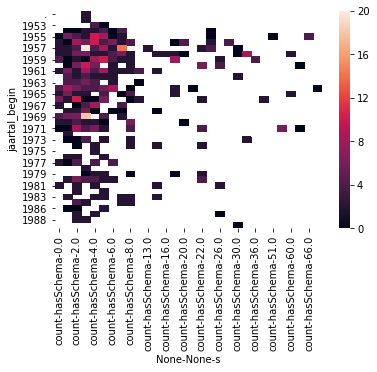

In [39]:
sns.heatmap(score_aggregated)

In [40]:
schemes_aggregated = pd.pivot_table(df, index=['jaartal_begin'],columns=['hasSchema'], values=['s'], aggfunc=['sum'])
schemes_aggregated.head()


sum                                                        \
                      s                                                         
hasSchema     ADSP/RCSS GAPS  JP    LP LP-VER   N  NAMA NESAS NESS  NGAS NGSS   
jaartal_begin                                                                   
.                   NaN  NaN NaN   NaN    NaN NaN   5.0   NaN  NaN   NaN  NaN   
1952                NaN  NaN NaN   NaN    NaN NaN   6.0   NaN  NaN   NaN  NaN   
1953                NaN  NaN NaN   6.0    NaN NaN   NaN   NaN  NaN   3.0  NaN   
1954                NaN  NaN NaN  13.0    NaN NaN   4.0   6.0  NaN   4.0  NaN   
1955                NaN  NaN NaN  47.0    8.0 NaN  29.0   NaN  NaN  21.0  NaN   

                             
                             
hasSchema     RCSS    S WHS  
jaartal_begin                
.              NaN  NaN NaN  
1952           NaN  3.0 NaN  
1953           NaN  2.0 NaN  
1954           NaN  7.0 NaN  
1955           4.0  NaN NaN

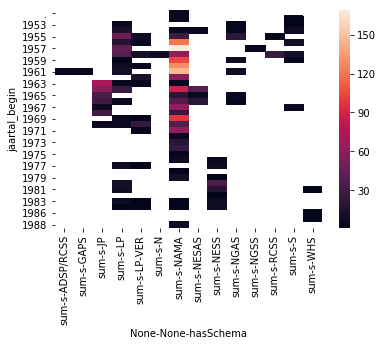

In [41]:
sns.heatmap(schemes_aggregated)

In [42]:
# we now compare the fronts of the first image with the other images taken together
fronts = df.groupby(['persoonsId']).first().reset_index()
fronts.head()



,persoonsId,edges,im_nr,image_x,imnm,imnr,kaart_nr,map,density,s,...,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,geslacht,hasReligion,adresAantal,eventsAantal,score
0,1.0,921,29_0001,NL-HaNA_2.05.159_29_0001.jpg,1,1,76abc6fc-e8eb-102c-b6de-005056a23d00,29,small,1,...,NaN,NaN,NaN,1,Alleen,Vrouw,Niet ingevuld,1.0,NaN,1
1,96.0,1847,29_0201,NL-HaNA_2.05.159_29_0201.jpg,201,201,76ade310-e8eb-102c-b6de-005056a23d00,29,large,3,...,Uithoorn,NaN,NAMA,2,Echtpaar,NaN,NH,3.0,2,3
2,178.0,1666,35_0201,NL-HaNA_2.05.159_35_0201.jpg,201,201,76af9d54-e8eb-102c-b6de-005056a23d00,35,large,3,...,NaN,Amsterdam,NAMA,1,Alleen,Man,Geref.,5.0,13,3
3,321.0,1788,35_0401,NL-HaNA_2.05.159_35_0401.jpg,401,401,76b2bcd2-e8eb-102c-b6de-005056a23d00,35,large,3,...,Den Bosch,NaN,NAMA,4,Gezin,NaN,RK,2.0,1,3
4,405.0,1436,37_0401,NL-HaNA_2.05.159_37_0401.jpg,401,401,76b48d28-e8eb-102c-b6de-005056a23d00,37,medium,2,...,Den Haag,NaN,NaN,2,Echtpaar,NaN,Protestant,1.0,1,2


##  comment

the previous _DOES NOT WORK_  as the joining duplicates data so we do it differently

In [43]:
clean_ims = pd.read_csv('csvs/unims2.csv', sep=";")

In [44]:
gr = clean_ims.groupby(['persoonsId'])


In [45]:
fronts = clean_ims.groupby(['persoonsId']).first().reset_index() 

# the first method gives the first record in a group. Here, that is the first image of the first card 
# (i.e administrative data)


In [46]:
#fronts.to_csv('csvs/frontims.csv', sep='\t')

In [47]:
#rests = clean_ims(clean_ims.groupby('persoonsId').apply(lambda g: g.index[1:]))

In [48]:
grouped = clean_ims.groupby('persoonsId')
#grouped.agg(lambda x: x.iloc[1:]) # this crashes the kernel because of some obscure bug

In [49]:
#rests.to_csv('csvs/restims.csv',sep="\t")

In [50]:
fronts.columns

Index(['persoonsId', 'edges', 'im_nr', 'imnm', 'imnr', 'kaart_nr', 'map',
       'density', 's'],
      dtype='object')

In [51]:
scores = grouped['s'].sum()
scores = scores.to_frame()

In [52]:
scores = scores.merge(fronts, on='persoonsId', how='left')

In [53]:
scores['restscore'] = scores['s_x'] - scores['s_y']
scores.head()

,persoonsId,s_x,edges,im_nr,imnm,imnr,kaart_nr,map,density,s_y,restscore
0,1.0,1,921,29_0001,1,1,76abc6fc-e8eb-102c-b6de-005056a23d00,29,small,1,0
1,96.0,4,1847,29_0201,201,201,76ade310-e8eb-102c-b6de-005056a23d00,29,large,3,1
2,178.0,7,1666,35_0201,201,201,76af9d54-e8eb-102c-b6de-005056a23d00,35,large,3,4
3,321.0,3,1788,35_0401,401,401,76b2bcd2-e8eb-102c-b6de-005056a23d00,35,large,3,0
4,405.0,2,1436,37_0401,401,401,76b48d28-e8eb-102c-b6de-005056a23d00,37,medium,2,0


In [54]:
scores.rename(columns={'s_x':'total_score', 's_y':'front_score', 'restscore':'rest_score'}, inplace=True)

In [55]:
scored_pers = ounits.merge(scores, on='persoonsId', how="inner")
scored_pers

,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,...,total_score,edges,im_nr,imnm,imnr,kaart_nr,map,density,front_score,rest_score
0,34120.0,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,6,Gezin,...,7,2090,9_2011,2011,2011,79869974-e8eb-102c-b6de-005056a23d00,9,dense,4,3
1,46567.0,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,1,Alleen,...,3,1390,21_1801,1801,1801,7a91d694-e8eb-102c-b6de-005056a23d00,21,medium,2,1
2,3053.0,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,...,11,2311,31_1201,1201,1201,76ed6b98-e8eb-102c-b6de-005056a23d00,31,dense,4,7
3,3053.0,Th.H.A.,van den,Broek,1914,NaN,NaN,LP-VER,7,Echtpaar,...,11,2311,31_1201,1201,1201,76ed6b98-e8eb-102c-b6de-005056a23d00,31,dense,4,7
4,5515.0,L.F.,van,Esseveld,1892,Oosbaan,Alkmaar,LP,2,Echtpaar,...,7,1605,33_1601,1601,1601,77223828-e8eb-102c-b6de-005056a23d00,33,large,3,4
5,5515.0,L.F.,van,Esseveld,NaN,NaN,NaN,NaN,2,Echtpaar,...,7,1605,33_1601,1601,1601,77223828-e8eb-102c-b6de-005056a23d00,33,large,3,4
6,27092.0,G.,de,Kroon,1916,NaN,Alkmaar,NGSS,6,Gezin,...,3,1535,4_0475,475,475,78ecc2ea-e8eb-102c-b6de-005056a23d00,4,large,3,0
7,33773.0,H.,NaN,Blumink,1910,NaN,Alkmaar,NAMA,5,Gezin,...,3,1578,9_1011,1011,1011,797f426e-e8eb-102c-b6de-005056a23d00,9,large,3,0
8,4612.0,Th.,van den,Dolder,1916,Lonneker,Almelo,NAMA,7,Gezin,...,15,1606,32_1999,1999,1999,770e6168-e8eb-102c-b6de-005056a23d00,32,large,3,12
9,4612.0,Th.,vd,Dolder,1916,NaN,Almelo,NAMA,7,Gezin,...,15,1606,32_1999,1999,1999,770e6168-e8eb-102c-b6de-005056a23d00,32,large,3,12


In [56]:
scored_pers.columns

Index(['persoonsId', 'initialen', 'tussenvoegsel', 'achternaam',
       'geboortejaar', 'hasBirthPlace', 'hasResidenceLocation', 'hasSchema',
       'hasUnit', 'samenstelling', 'geslacht', 'hasReligion', 'adresAantal',
       'eventsAantal', 'is_duplicaat',
       'duplicaten bevatten afwijkende gegevens', 'Heeft geen correct id',
       'total_score', 'edges', 'im_nr', 'imnm', 'imnr', 'kaart_nr', 'map',
       'density', 'front_score', 'rest_score'],
      dtype='object')

In [57]:
score_schema = scored_pers.groupby('hasSchema')

In [60]:
score_fronts = pd.pivot_table(scored_pers, index='front_score', columns=['hasSchema'], values='persoonsId', aggfunc='count')
score_fronts.head()

hasSchema,ADSP/RCSS,DNS,FMS,GAPS,JP,LP,LP-VER,N,NAMA,NESAS,NESS,NGAS,NGSS,RCSS,S,WHS,geen
front_score,,,,,,,,,,,,,,,,,
0,1.0,NaN,1.0,1.0,2.0,12.0,3.0,NaN,10.0,NaN,8.0,NaN,NaN,2.0,2.0,2.0,1.0
1,NaN,1.0,NaN,NaN,NaN,10.0,2.0,1.0,38.0,NaN,6.0,1.0,NaN,1.0,1.0,2.0,1.0
2,NaN,NaN,1.0,1.0,2.0,19.0,5.0,NaN,55.0,3.0,6.0,3.0,NaN,2.0,7.0,NaN,1.0
3,NaN,NaN,NaN,1.0,6.0,12.0,5.0,NaN,82.0,NaN,1.0,3.0,2.0,1.0,3.0,NaN,NaN
4,NaN,NaN,NaN,NaN,6.0,10.0,3.0,1.0,39.0,2.0,2.0,3.0,NaN,3.0,3.0,NaN,NaN


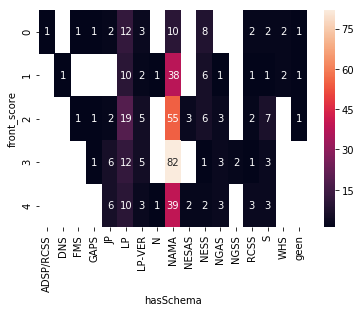

In [59]:
sns.heatmap(score_fronts, annot=True)

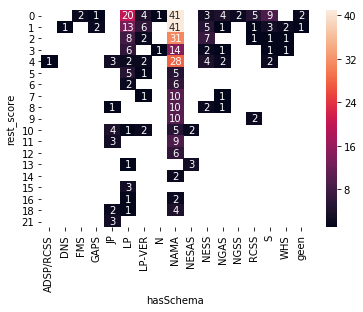

In [162]:
score_rest = pd.pivot_table(scored_pers, index='rest_score', columns=['hasSchema'], values='persoonsId', aggfunc='count')
sns.heatmap(score_rest, annot=True)

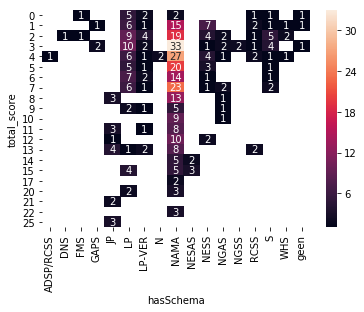

In [161]:
score_total = pd.pivot_table(scored_pers, index='total_score', columns=['hasSchema'], values='persoonsId', aggfunc='count')
sns.heatmap(score_total, annot=True)

## Analysis

The heatplots above differentiate between the **fronts** of the *first cards* and all other images added. Instead of scoring this with 'empty' to 'dense', we have assigned them a value ranging from 0 to 4, where 0 is an empty card and 4 is a dense card. So the fronts of the first card that mainly contain administrative data are separated from the back of the first card, that contain records of the interactions between the migrants and the consulates. There appear to be more differences between those and just the administrative data. Time to explore this further!


The NAMA scheme has most differentiated values, but also the highest values. But the JP scheme cards are more densely filled out, and there is also information in the LP and LP_VER schemes. 

In [152]:
s

front_score
0     45
1     64
2    105
3    116
4     72
Name: hasSchema, dtype: int64

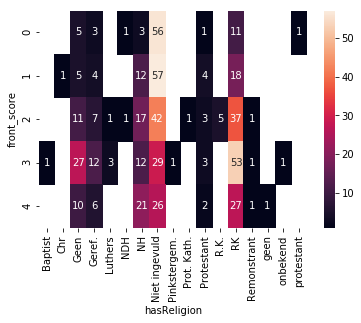

In [171]:
religion_fronts = pd.pivot_table(scored_pers, index='front_score', columns=['hasReligion'], values='persoonsId', aggfunc='count')
sns.heatmap(religion_fronts, annot=True)

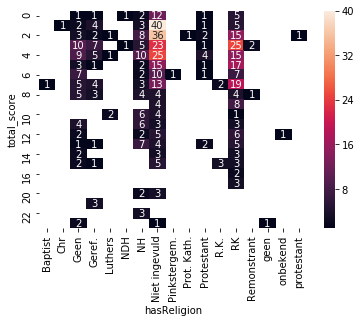

In [173]:
religion_total = pd.pivot_table(scored_pers, index='total_score', columns=['hasReligion'], values='persoonsId', aggfunc='count')
sns.heatmap(religion_total, annot=True)

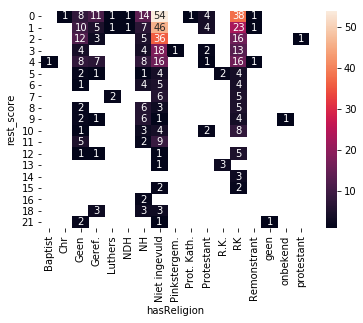

In [175]:
religion_rest = pd.pivot_table(scored_pers, index='rest_score', columns=['hasReligion'], values='persoonsId', aggfunc='count')
sns.heatmap(religion_rest, annot=True)

In [178]:
norms = {'protestant': ['Protestant', 'protestant', 'NDH', 'NH', 'Geref.', 'Chr.','Chr'],
                        'catholic' :['R.K.', 'RK'],
                        'no_religion': ['geen','Geen'],
                        'unknown': ['Niet ingevuld','onbekend', ],
                        'other' : ['Baptist' , 'Luthers',  'Pinkstergem.', 'Prot. Kath.','Remonstrant']}

# reverse dictionary for mapping
rev_norms = {svalue: key for key, value in norms.items() for svalue in value}

scored_pers['normalized_religion'] = scored_pers.hasReligion.replace(rev_norms)
scored_pers.normalized_religion = scored_pers.normalized_religion.astype('category')

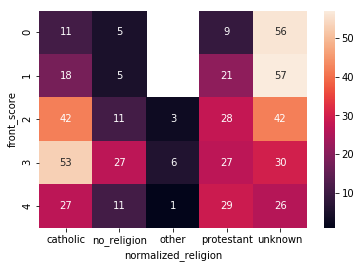

In [180]:
religion_front_norm = pd.pivot_table(scored_pers, index='front_score', columns=['normalized_religion'], values='persoonsId', aggfunc='count')
sns.heatmap(religion_front_norm, annot=True)

## Comments

These are the card fronts, so the administrative records

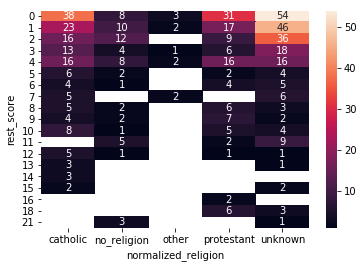

In [181]:
religion_rest_norm = pd.pivot_table(scored_pers, index='rest_score', columns=['normalized_religion'], values='persoonsId', aggfunc='count')
sns.heatmap(religion_rest_norm, annot=True)

## Analysis

This gives a different view. In general, the Catholic migrants had more interactions altogether but were also more numerous. The migrants with the most interactions with the consulates seem to have been the ones without or unknown religious affiliation. We have made this clearer by normalizing the religion. 

In addition to this, it should be remembered, that above 4 there is at least one dense card, filled with interactions with the consulates. In a further simplifications, this could be visualized as well, as is visible below.

From now on, we will keep this normalized score, as it reduces the influence of several cards. The 'dense' category would have more than one card. XXXcheck

In [184]:
scored_pers['normalized_score'] = pd.cut(scored_pers.rest_score, [0, 1, 2, 3, 4, scored_pers.rest_score.max()],
               labels=['empty','small', 'medium','large','dense'])

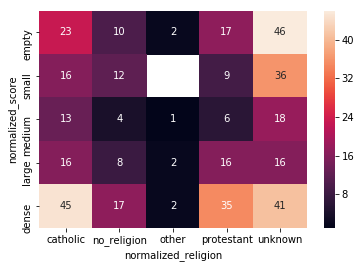

In [185]:
religion_rests_norm = pd.pivot_table(scored_pers, index='normalized_score', columns=['normalized_religion'], values='persoonsId', aggfunc='count')
sns.heatmap(religion_rests_norm, annot=True)

In [187]:
scored_pers.normalized_religion.count()

545

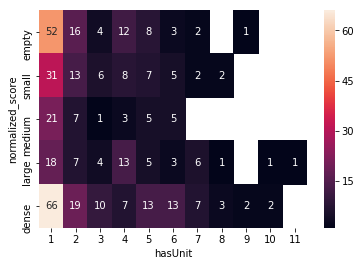

In [190]:
unittype_rest_norm = pd.pivot_table(scored_pers, index='normalized_score', columns=[scored_pers.hasUnit], values='persoonsId', aggfunc='count')
sns.heatmap(unittype_rest_norm, annot=True)

In [191]:
norms = {'Gezin': ['gezin', 'Gezin', 'Vrouw met kinderen'],
         'Alleen': ['Alleen', 'Man']}

# reverse dictionary for mapping
sam_norms = {svalue: key for key, value in norms.items() for svalue in value}

scored_pers['normalized_samenstelling'] = scored_pers.samenstelling.replace(sam_norms)
scored_pers.normalized_samenstelling = scored_pers.normalized_samenstelling.astype('category')

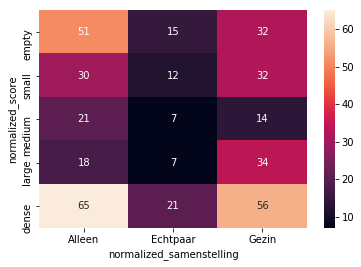

In [192]:
samenstelling_rest_norm = pd.pivot_table(scored_pers, index='normalized_score', columns=[scored_pers.normalized_samenstelling], values='persoonsId', aggfunc='count')
sns.heatmap(samenstelling_rest_norm, annot=True)

## Analysis

The single migrants seem to have either no interactions, or a lot of interactions with the consulates. XXX say something about relative scores

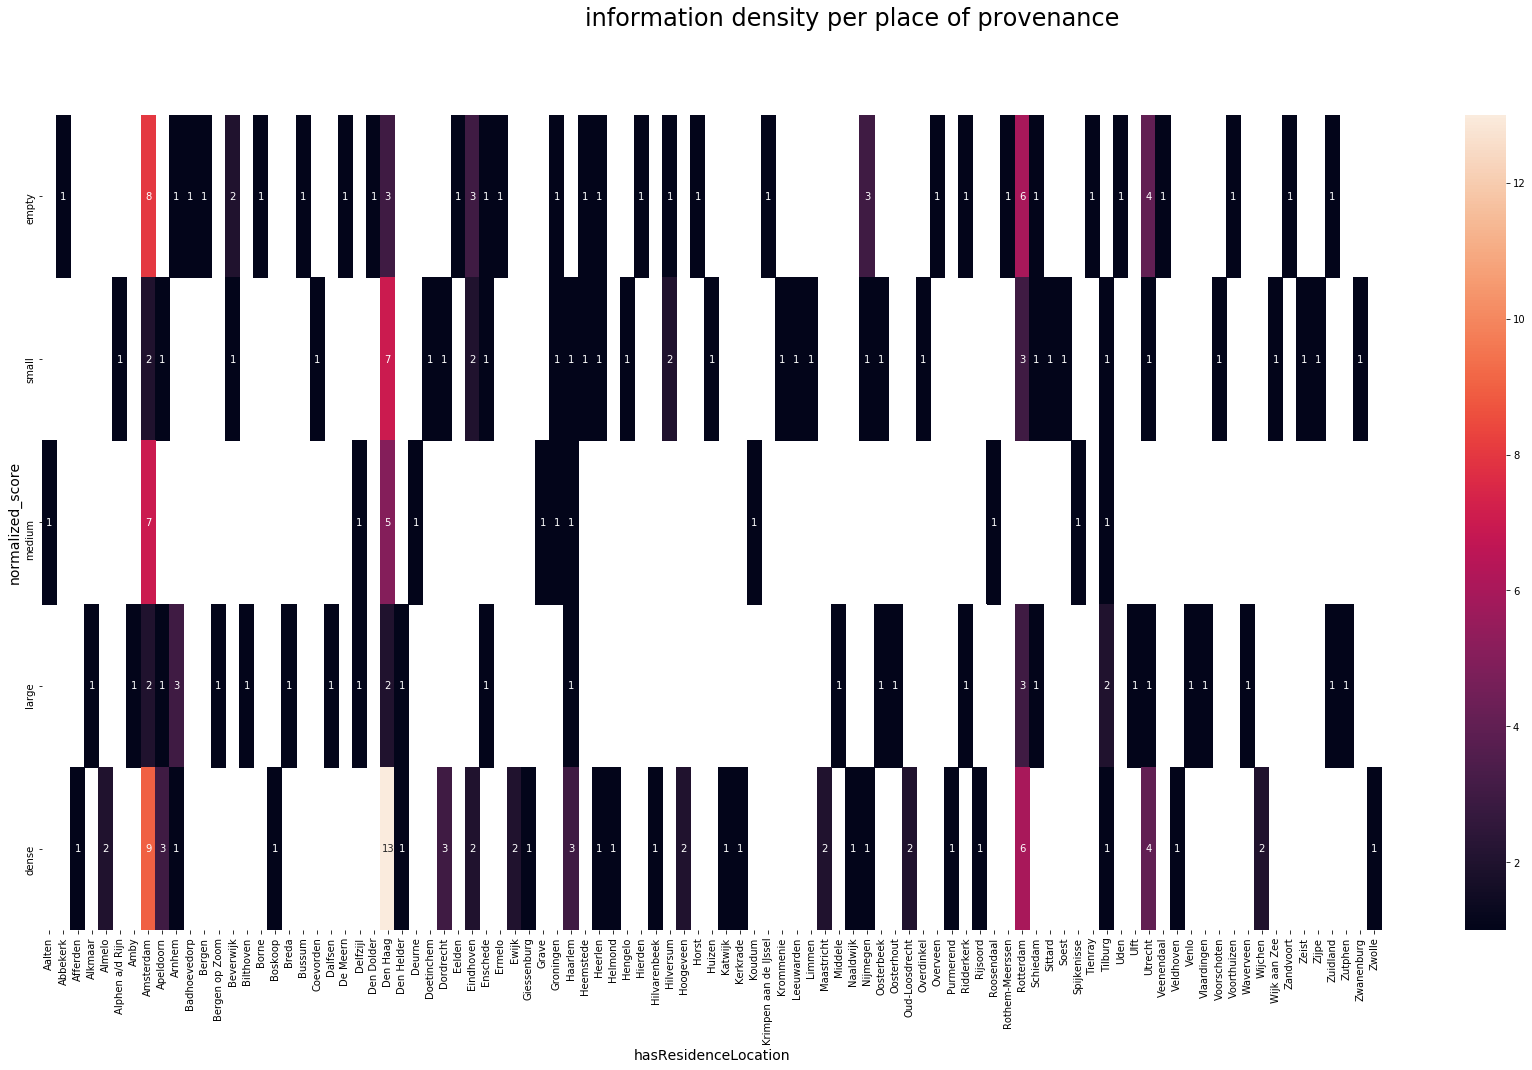

In [194]:
provenance_rest_norm = pd.pivot_table(scored_pers, index='normalized_score', columns=[scored_pers.hasResidenceLocation], values='persoonsId', aggfunc='count')

fig = plt.figure(figsize=(30, 15))
fig.suptitle("information density per place of provenance",fontsize=24)


ax1 = fig.add_subplot(111)
ax1.set_xlabel('provenance', fontsize=14)
ax1.set_ylabel('density', fontsize=14)
#ax1.set_title("", fontsize=18)
sns.heatmap(provenance_rest_norm, annot=True, ax=ax1)

In [227]:
travels = steekproef.parse('emtravels')
travels = travels.drop(travels.index[:2], axis=0)
travels.head()

,aq,ar,as,(k),(L),(c)
4,reis,0,0,-,NaN,23521
8,reis,1954,1954,-,NaN,23805
66,reis,0,0,-,NaN,27617
72,reis,0,0,-,NaN,27997
73,reis,0,0,-,NaN,27997


In [234]:
print(len(travels))
travels = travels[~travels['(c)'].duplicated(keep='first')]
print(len(travels))


444
444


In [260]:
travels['id'] = travels['(c)'].astype(np.int64)
travels['reis'] = travels['ar'].replace('onbekend', '0')
travels['reis'] = travels['reis'].astype(np.int64)

reis=travels[['id','reis']]
reis.reis.dtype

dtype('int64')

In [262]:
scored_pers = scored_pers.merge(reis, left_on=scored_pers.persoonsId, right_on=reis.id, how='inner')

In [317]:
scored_pers.geboortejaar = scored_pers.geboortejaar
scored_pers.geboortejaar = scored_pers.geboortejaar.replace('onbekend', '0')
scored_pers.geboortejaar = scored_pers.geboortejaar.fillna('0')
scored_pers.geboortejaar = scored_pers.geboortejaar.astype(np.int64, inplace=True)

scored_pers["age"] = scored_pers.reis - scored_pers.geboortejaar
scored_pers.head()

#bins_dt = pd.date_range('2000-01-01', freq='3D', periods=6)
#bins_str = bins_dt.astype(str).values


,key_0,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,...,map,density,front_score,rest_score,normalized_religion,normalized_score,normalized_samenstelling,id,reis,age
0,34120,34120,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,6,...,9,dense,4,3,catholic,medium,Gezin,34120,1956,24
1,46567,46567,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,1,...,21,medium,2,1,catholic,empty,Alleen,46567,1955,22
2,3053,3053,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,...,31,dense,4,7,catholic,dense,Gezin,3053,1958,44
3,3053,3053,Th.H.A.,van den,Broek,1914,NaN,NaN,LP-VER,7,...,31,dense,4,7,NaN,dense,Echtpaar,3053,1958,44
4,5515,5515,L.F.,van,Esseveld,1892,Oosbaan,Alkmaar,LP,2,...,33,large,3,4,protestant,large,Echtpaar,5515,1953,61


In [322]:
bins = pd.cut(scored_pers.age, bins=range(1, 100, 5))
r = range(0, 100, 5)
labels=[]
for i in range(len(r)-1):
    labels.append(('{}-{}'.format(r[i], r[i+1])))
scored_pers['age_bin'] = pd.cut(scored_pers.age, bins=range(1, 100, 5), labels=labels)

In [343]:
agebin = pd.pivot_table(scored_pers, index=['age_bin'], values=['persoonsId'], aggfunc='count')
agebin.head()

,persoonsId
age_bin,
0-5,1
5-10,1
10-15,3
15-20,53
20-25,108


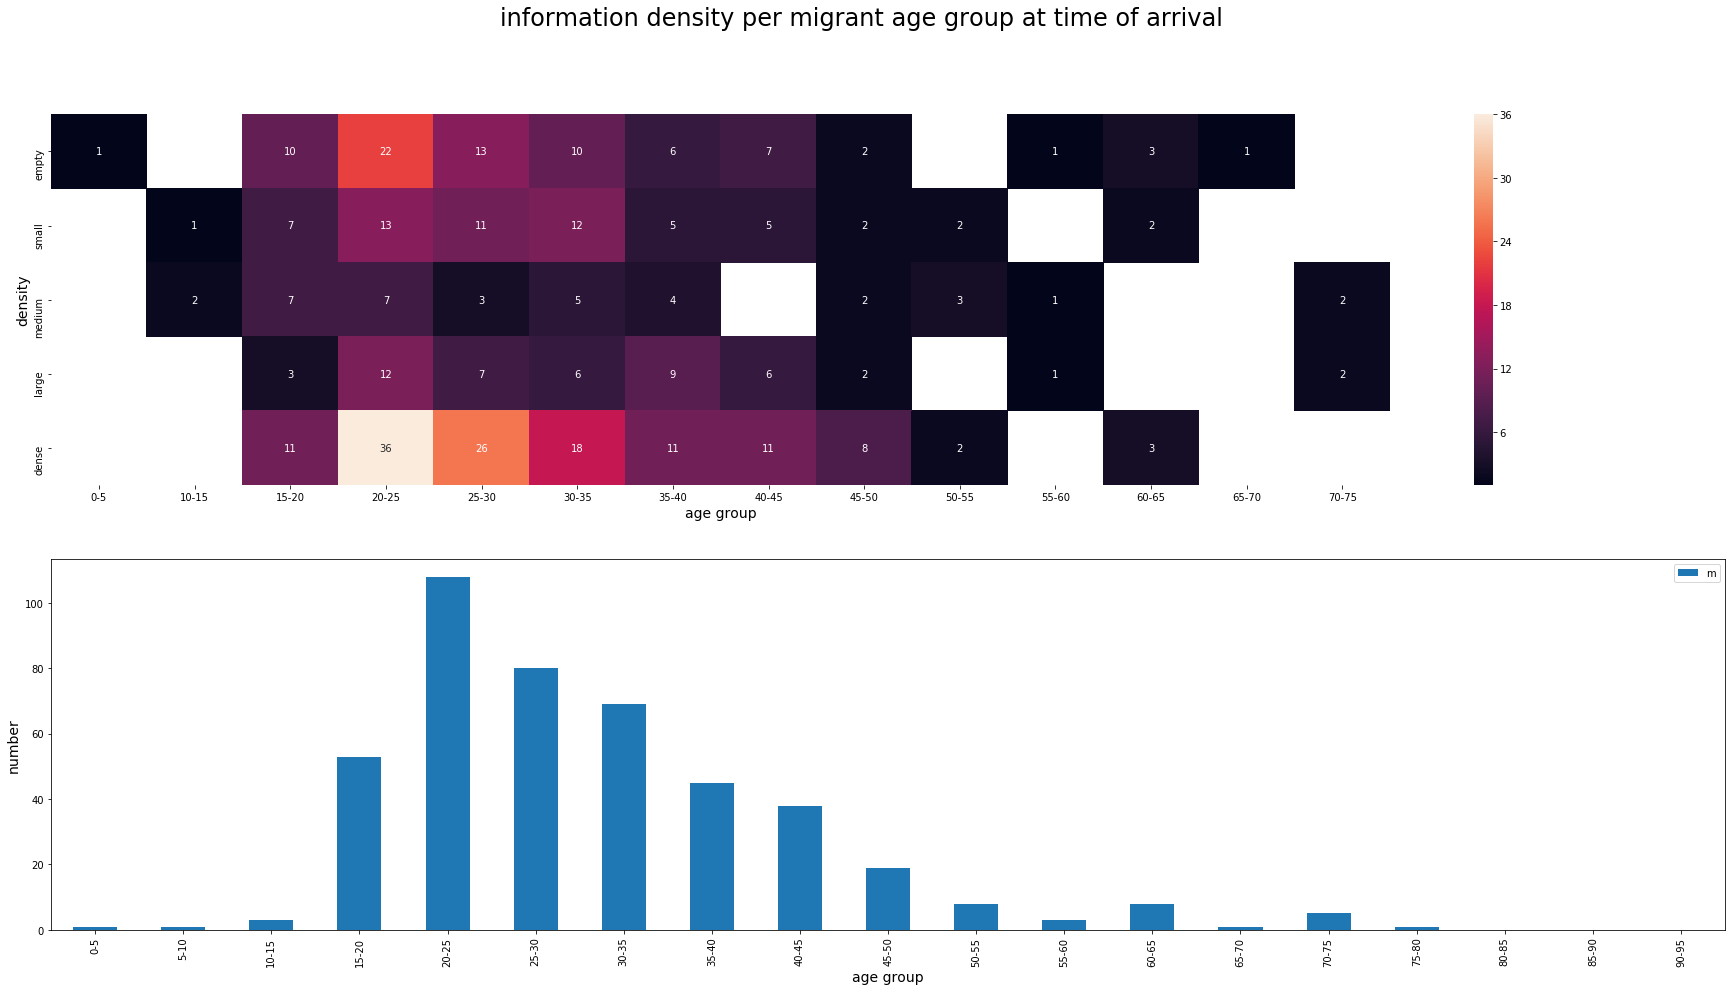

In [348]:
age_schema = pd.pivot_table(scored_pers, index=scored_pers.normalized_score, columns=['age_bin'], values='persoonsId', aggfunc='count')


fig = plt.figure(figsize=(30, 15))
fig.suptitle("information density per migrant age group at time of arrival",fontsize=24)


ax1 = fig.add_subplot(211)
sns.heatmap(age_schema, annot=True, ax=ax1)
ax1.set_xlabel('age group', fontsize=14)
ax1.set_ylabel('density', fontsize=14)




ax2 = fig.add_subplot(212)

agebin.plot.bar(ax=ax2)
ax2.set_ylabel('number', fontsize=14)
ax2.set_xlabel('age group', fontsize=14)
ax2.legend('migrants')

## comment

The heatmap means that the 'hotter' the squares, the more people there are (in this case in the sample) that have cards with a certain density. This can be translated to a percentage. For example, roughly taken, there are 35 % migrants from the age group 20-25 that have dense cards XXXX uitschrijven If projected to all the cards, that means that if you take XXX uitschrijven

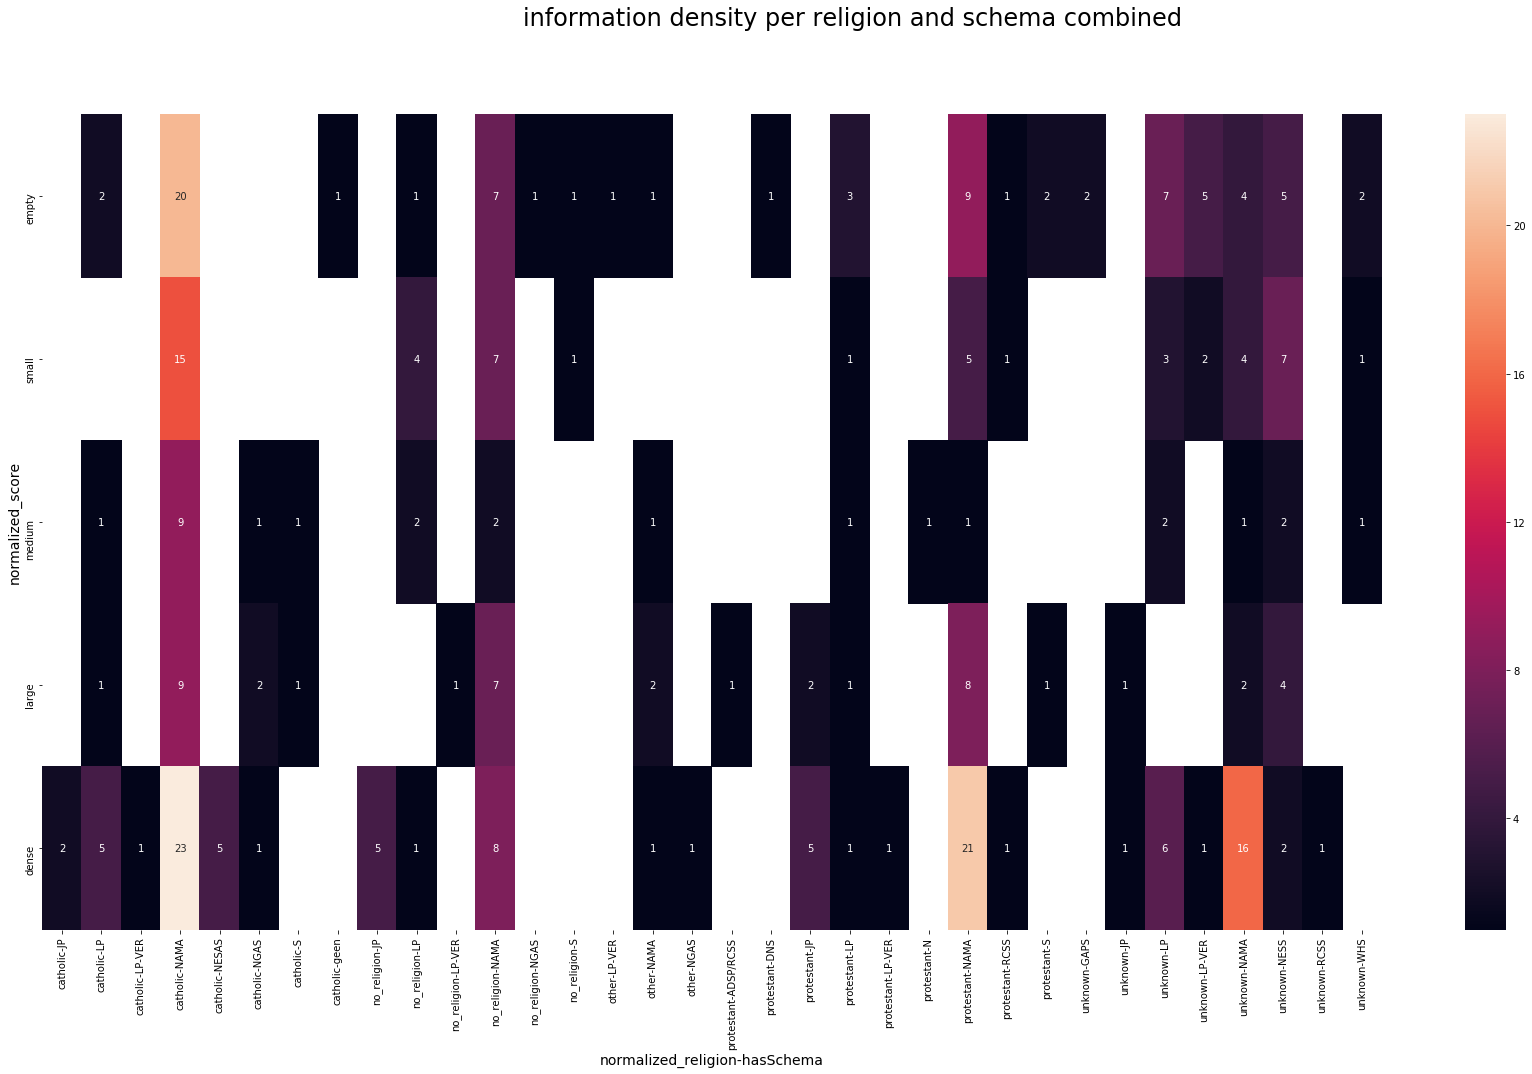

In [197]:
# combining categories

# schema and religion

religion_schema = pd.pivot_table(scored_pers, index=scored_pers.normalized_score, columns=['normalized_religion', 'hasSchema'], values='persoonsId', aggfunc='count')


fig = plt.figure(figsize=(30, 15))
fig.suptitle("information density per religion and schema combined",fontsize=24)


ax1 = fig.add_subplot(111)
ax1.set_xlabel('schema and religion', fontsize=14)
ax1.set_ylabel('density', fontsize=14)

sns.heatmap(religion_schema, annot=True)

In [349]:
scored_pers.hasSchema.unique()

array(['NAMA', 'LP-VER', 'LP', nan, 'NGSS', 'JP', 'RCSS', 'NESS', 'NGAS',
       'N', 'GAPS', 'S', 'DNS', 'NESAS', 'FMS', 'ADSP/RCSS', 'WHS',
       'geen'], dtype=object)

In [67]:
# let's reduce the number of schemas

norms = {'NAMA': ['NAMA'],
         'LP': ['LP-VER', 'LP'],
         'NESS':['NESS']  , 
         'NGSS':['NGSS'], 
         'JP': ['JP'],
         'other': ['RCSS', 'N', 'GAPS', 'S', 'DNS', 'NESAS', 'FMS', 'ADSP/RCSS', 'WHS','geen', np.nan]
        }

# reverse dictionary for mapping
sch_norms = {svalue: key for key, value in norms.items() for svalue in value}

scored_pers['normalized_schemas'] = scored_pers.hasSchema.replace(sch_norms)
scored_pers.normalized_schemas = scored_pers.normalized_schemas.astype('category')

In [73]:
sns.catplot(y="s", x="hasSchema", kind="swarm",
            data=score_fronts, height=10, aspect=2)

ValueError: Could not interpret input 'hasSchema'

Text(249.0, 0.5, 'density')

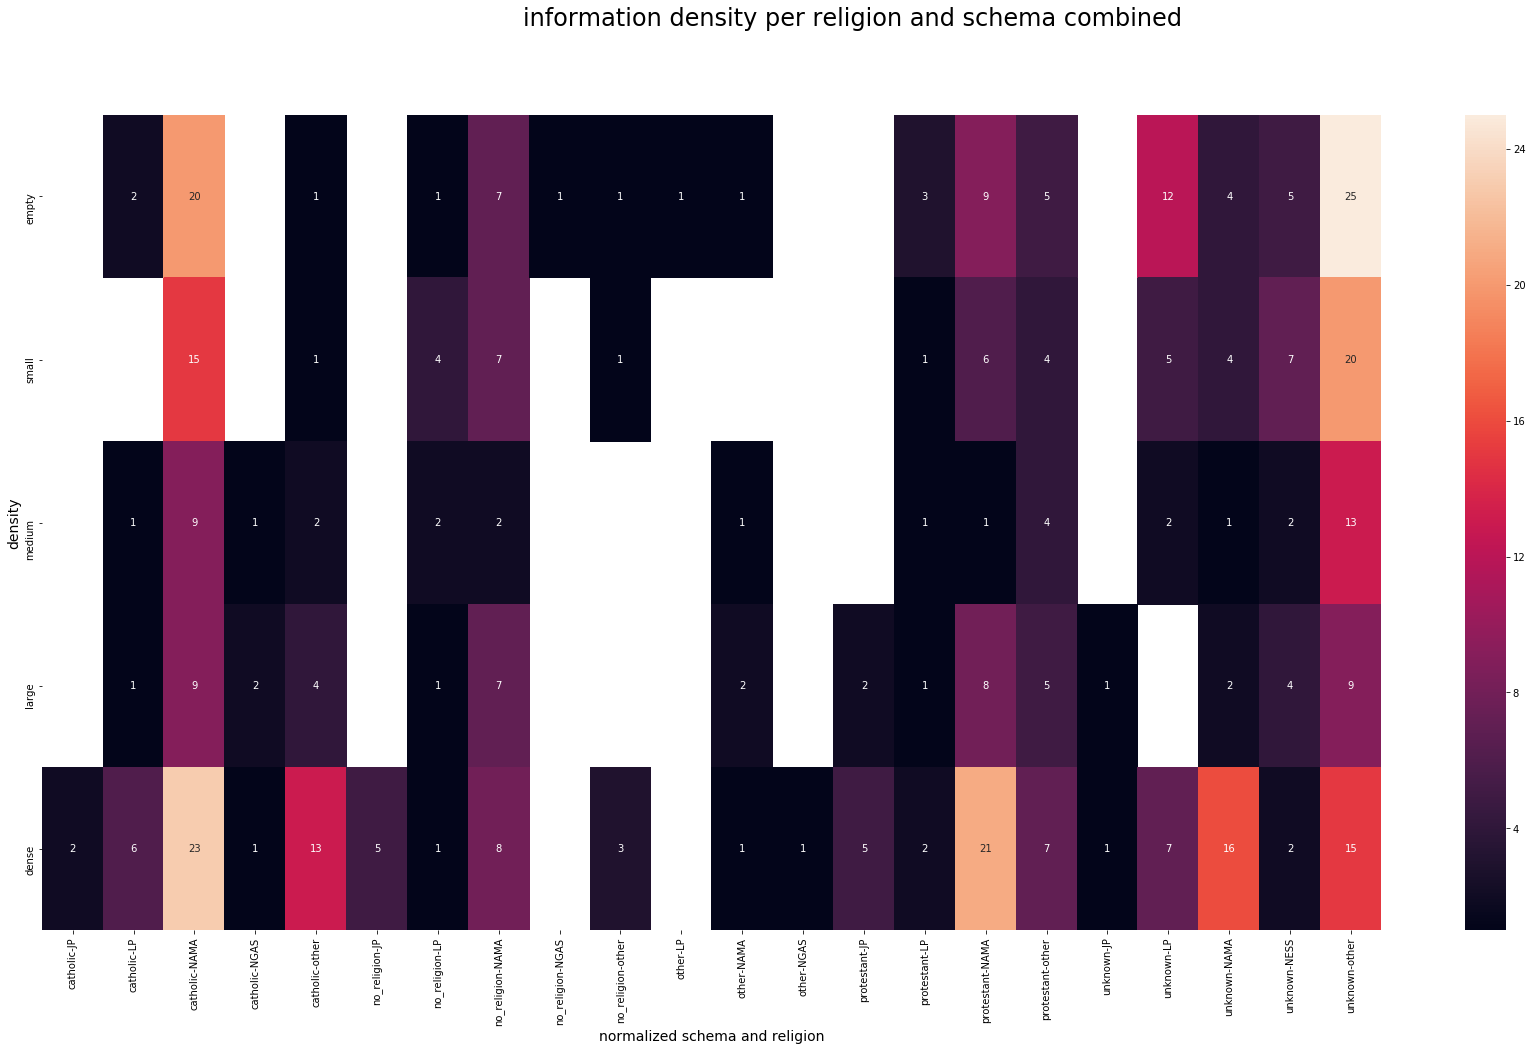

In [356]:
N_religion_schema = pd.pivot_table(scored_pers, index=scored_pers.normalized_score, columns=['normalized_religion', 'normalized_schemas'], values='persoonsId', aggfunc='count')


fig = plt.figure(figsize=(30, 15))
fig.suptitle("information density per religion and schema combined",fontsize=24)


ax1 = fig.add_subplot(111)


sns.heatmap(N_religion_schema, annot=True)
ax1.set_xlabel('normalized schema and religion', fontsize=14)
ax1.set_ylabel('density', fontsize=14)

In [384]:
N_religion_schema_count = pd.pivot_table(scored_pers, index='normalized_score', 
                                   columns=['normalized_schemas','normalized_religion', 'normalized_samenstelling'], 
                                   values='persoonsId', aggfunc='count')
N_religion_schema_sum = pd.pivot_table(scored_pers, index='normalized_score', 
                                   columns=['normalized_schemas','normalized_religion', 'normalized_samenstelling'], 
                                   values='rest_score', aggfunc='sum')

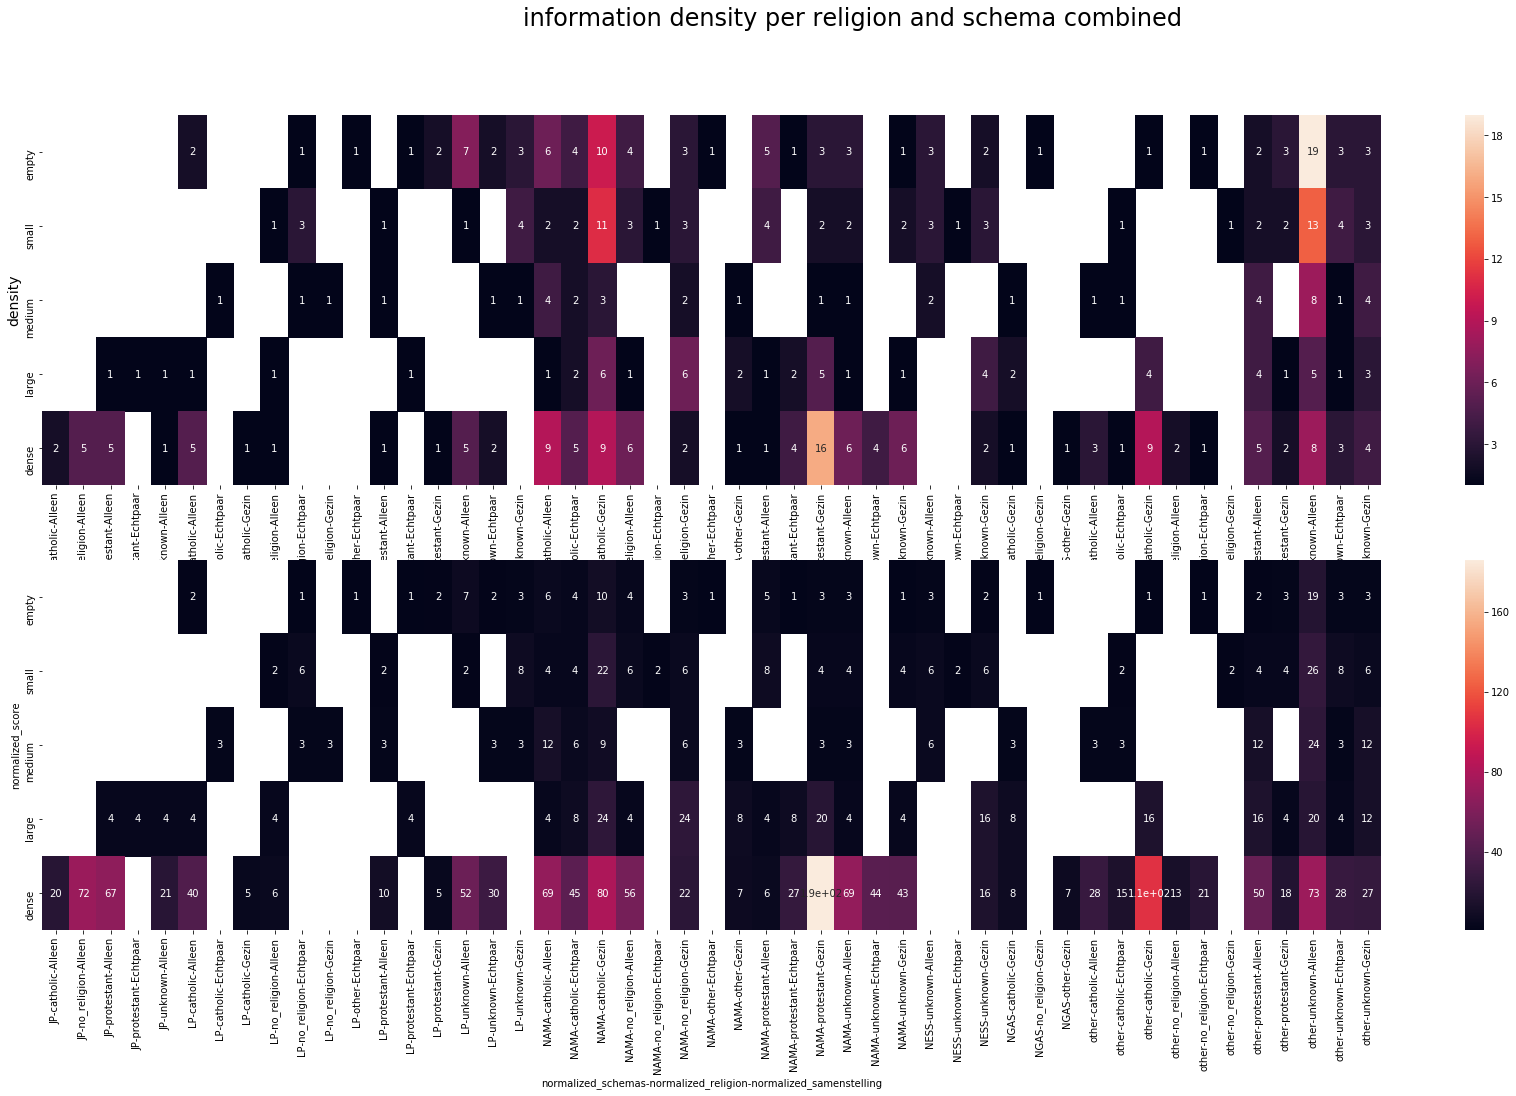

In [385]:


fig = plt.figure(figsize=(30, 15))
fig.suptitle("information density per religion and schema combined",fontsize=24)


ax1 = fig.add_subplot(211)


sns.heatmap(N_religion_schema, annot=True)
ax1.set_xlabel('normalized schema and religion', fontsize=14)
ax1.set_ylabel('density', fontsize=14)

ax2 = fig.add_subplot(212)
sns.heatmap(N_religion_schema_sum, annot=True)

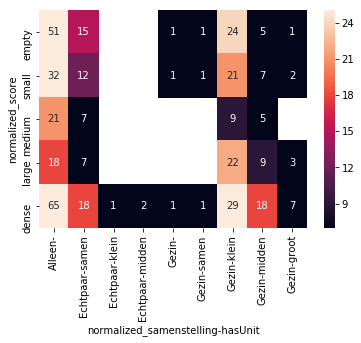

In [390]:
normalized_grootte = pd.cut(scored_pers.hasUnit, bins=[0,1,2,5,7,11], labels=['','samen','klein', 'midden','groot'])
samenst_grootte = pd.pivot_table(scored_pers, index='normalized_score', 
                                    columns=[scored_pers.normalized_samenstelling, normalized_grootte], values='persoonsId', aggfunc='count')

sns.heatmap(samenst_grootte, vmin=7, vmax=25, annot=True)

In [380]:
N_religion_schema.NAMA

normalized_religion      catholic                no_religion                 \
normalized_samenstelling   Alleen Echtpaar Gezin      Alleen Echtpaar Gezin   
normalized_score                                                              
empty                         6.0      4.0  10.0         4.0      NaN   3.0   
small                         2.0      2.0  11.0         3.0      1.0   3.0   
medium                        4.0      2.0   3.0         NaN      NaN   2.0   
large                         1.0      2.0   6.0         1.0      NaN   6.0   
dense                         9.0      5.0   9.0         6.0      NaN   2.0   

normalized_religion         other       protestant                unknown  \
normalized_samenstelling Echtpaar Gezin     Alleen Echtpaar Gezin  Alleen   
normalized_score                                                            
empty                         1.0   NaN        5.0      1.0   3.0     3.0   
small                         NaN   NaN        4.0      NaN   2.0     2.0   
medium                        NaN   1.0        NaN      NaN   1.0     1.0   
large                         NaN   2.0        1.0      2.0   5.0     1.0   
dense                         NaN   1.0        1.0      4.0  16.0     6.0   

normalized_religion                      
normalized_samenstelling Echtpaar Gezin  
normalized_score                         
empty                         NaN   1.0  
small                         NaN   2.0  
medium                        NaN   NaN  
large                         NaN   1.0  
dense                         4.0   6.0

In [ ]:
scored_pers.loc[(scored_pers.normalized_samenstelling == 'Gezin') & (scored_pers.normalized_religion == 'catholic')].plot()

In [406]:
scored_pers.to_csv('csvs/scored_pers.csv', sep='\t')